##  DATA PRE-PROCESSING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
dataset = pd.read_csv("property_data.csv")
dataset.head()

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
0,850000000,100,50,3.0,2,0,1.324517,Jawa Timur,Surabaya,Tambaksari,NaN,NaN
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
2,3500000000,201,113,3.0,4,1,0.929438,Jakarta,Jakarta Timur,Matraman,NaN,NaN
3,38000000000,600,1028,5.0,4,4,2.932825,Jakarta,Jakarta Pusat,Kemayoran,NaN,NaN
4,1800000000,150,180,3.0,2,0,0.586065,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN


In [25]:
prov = dataset[dataset['province'] == 'Banten']
prov

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
6,1300000000,70,102,2.0,1,0,1.166187,Banten,Tangerang Selatan,BSD City,NaN,NaN
18,1500000000,60,64,2.0,2,0,1.030467,Banten,Tangerang Selatan,Ciputat Timur,NaN,NaN
29,800000000,180,125,3.0,2,0,0.701865,Banten,Tangerang,Karawaci,NaN,NaN
35,1500000000,130,90,3.0,2,0,0.622571,Banten,Tangerang Selatan,Pondok Aren,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
594633,3500000000,139,120,4.0,3,0,0.586065,Banten,Tangerang Selatan,Pondok Aren,-6.273348,106.709877
594634,2500000000,160,120,3.0,2,0,0.586065,Banten,Tangerang Selatan,Pondok Aren,-6.286510,106.698732
594636,2935500000,145,123,4.0,3,0,0.586065,Banten,Tangerang Selatan,Ciputat,-6.291165,106.718879
594641,280000000,30,60,2.0,1,0,1.575223,Banten,Tangerang,Jambe,-6.337467,106.493974


In [26]:
data = prov.iloc[:50000]
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
6,1300000000,70,102,2.0,1,0,1.166187,Banten,Tangerang Selatan,BSD City,NaN,NaN
18,1500000000,60,64,2.0,2,0,1.030467,Banten,Tangerang Selatan,Ciputat Timur,NaN,NaN
29,800000000,180,125,3.0,2,0,0.701865,Banten,Tangerang,Karawaci,NaN,NaN
35,1500000000,130,90,3.0,2,0,0.622571,Banten,Tangerang Selatan,Pondok Aren,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
351798,1635000000,60,105,2.0,1,0,1.166187,Banten,Tangerang Selatan,BSD City,-6.28217,106.68492
351799,25000000000,968,708,7.0,5,4,2.932825,Banten,Tangerang Selatan,BSD City,-6.28217,106.68492
351800,1250000000,70,72,3.0,2,0,0.889756,Banten,Tangerang Selatan,BSD City,-6.28217,106.68492
351801,20000000000,700,600,7.0,7,0,1.977932,Banten,Tangerang Selatan,BSD City,-6.28217,106.68492


In [27]:
# Menghitung mean dan standar deviasi
mean_price = np.mean(data['price'])
std_price = np.std(data['price'])

# Menghitung Z-score
data['z_score'] = (data['price'] - mean_price) / std_price

# Menghapus outlier
df_no_outliers = data[(data['z_score'] >= -3) & (data['z_score'] <= 3)]

# Menghapus kolom z_score jika tidak diperlukan lagi
data = df_no_outliers.drop(columns=['z_score'])

print(data)

              price  buildingSize  landSize  bedRooms  bathRooms  garages  \
1        1700000000           110       103       3.0          2        0   
6        1300000000            70       102       2.0          1        0   
18       1500000000            60        64       2.0          2        0   
29        800000000           180       125       3.0          2        0   
35       1500000000           130        90       3.0          2        0   
...             ...           ...       ...       ...        ...      ...   
351798   1635000000            60       105       2.0          1        0   
351799  25000000000           968       708       7.0          5        4   
351800   1250000000            70        72       3.0          2        0   
351801  20000000000           700       600       7.0          7        0   
351802    650000000            55        60       3.0          2        1   

               z province               city       district  latitude  \
1 

C:\Users\yunit\AppData\Local\Temp\ipykernel_13588\2110171523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z_score'] = (data['price'] - mean_price) / std_price


In [28]:
data = data[(data['buildingSize'] != 0) & (data['bedRooms'] != 0) & (data['bathRooms'] != 0)]

In [29]:
data = data.drop(['z','latitude', 'longitude'], axis=1)
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
1,1700000000,110,103,3.0,2,0,Banten,Tangerang Selatan,NaN
6,1300000000,70,102,2.0,1,0,Banten,Tangerang Selatan,BSD City
18,1500000000,60,64,2.0,2,0,Banten,Tangerang Selatan,Ciputat Timur
29,800000000,180,125,3.0,2,0,Banten,Tangerang,Karawaci
35,1500000000,130,90,3.0,2,0,Banten,Tangerang Selatan,Pondok Aren
...,...,...,...,...,...,...,...,...,...
351798,1635000000,60,105,2.0,1,0,Banten,Tangerang Selatan,BSD City
351799,25000000000,968,708,7.0,5,4,Banten,Tangerang Selatan,BSD City
351800,1250000000,70,72,3.0,2,0,Banten,Tangerang Selatan,BSD City
351801,20000000000,700,600,7.0,7,0,Banten,Tangerang Selatan,BSD City


In [30]:
missing_values = data.isnull().sum()
missing_values

price               0
buildingSize        0
landSize            0
bedRooms            0
bathRooms           0
garages             0
province            0
city                3
district        13439
dtype: int64

In [31]:
data = data.dropna()
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
6,1300000000,70,102,2.0,1,0,Banten,Tangerang Selatan,BSD City
18,1500000000,60,64,2.0,2,0,Banten,Tangerang Selatan,Ciputat Timur
29,800000000,180,125,3.0,2,0,Banten,Tangerang,Karawaci
35,1500000000,130,90,3.0,2,0,Banten,Tangerang Selatan,Pondok Aren
45,2350000000,94,84,3.0,3,0,Banten,Tangerang Selatan,BSD City
...,...,...,...,...,...,...,...,...,...
351798,1635000000,60,105,2.0,1,0,Banten,Tangerang Selatan,BSD City
351799,25000000000,968,708,7.0,5,4,Banten,Tangerang Selatan,BSD City
351800,1250000000,70,72,3.0,2,0,Banten,Tangerang Selatan,BSD City
351801,20000000000,700,600,7.0,7,0,Banten,Tangerang Selatan,BSD City


### DATA PROFILING

In [32]:
import ydata_profiling as pp

profile = pp.ProfileReport(data, minimal=True)
profile

KeyboardInterrupt: 

### DATA PROFILING PROPERTY <= 8 BEDROOMS

In [33]:
data = data[data['bedRooms'] <= 8]
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
6,1300000000,70,102,2.0,1,0,Banten,Tangerang Selatan,BSD City
18,1500000000,60,64,2.0,2,0,Banten,Tangerang Selatan,Ciputat Timur
29,800000000,180,125,3.0,2,0,Banten,Tangerang,Karawaci
35,1500000000,130,90,3.0,2,0,Banten,Tangerang Selatan,Pondok Aren
45,2350000000,94,84,3.0,3,0,Banten,Tangerang Selatan,BSD City
...,...,...,...,...,...,...,...,...,...
351798,1635000000,60,105,2.0,1,0,Banten,Tangerang Selatan,BSD City
351799,25000000000,968,708,7.0,5,4,Banten,Tangerang Selatan,BSD City
351800,1250000000,70,72,3.0,2,0,Banten,Tangerang Selatan,BSD City
351801,20000000000,700,600,7.0,7,0,Banten,Tangerang Selatan,BSD City


In [ ]:
profile = pp.ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ELBOW PLOT

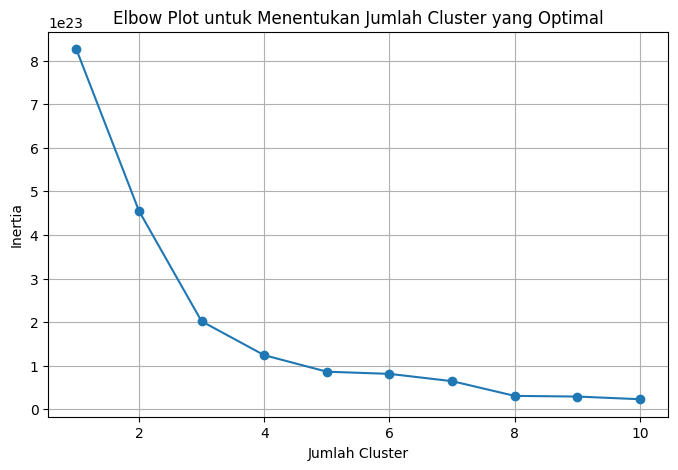

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Menambahkan magic command untuk Jupyter Notebook
%matplotlib inline


# Pilih fitur yang relevan untuk klastering
X = data[['bedRooms', 'price', 'buildingSize', 'landSize', 'bathRooms', 'garages']].values

# Menentukan rentang jumlah cluster yang akan diuji
range_n_clusters = list(range(1, 11))

# Menjalankan K-Means untuk setiap jumlah cluster dan menyimpan inertia
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Membuat elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Plot untuk Menentukan Jumlah Cluster yang Optimal')
plt.grid(True)
plt.show()

### CLUSTERING WITH K-MEANS

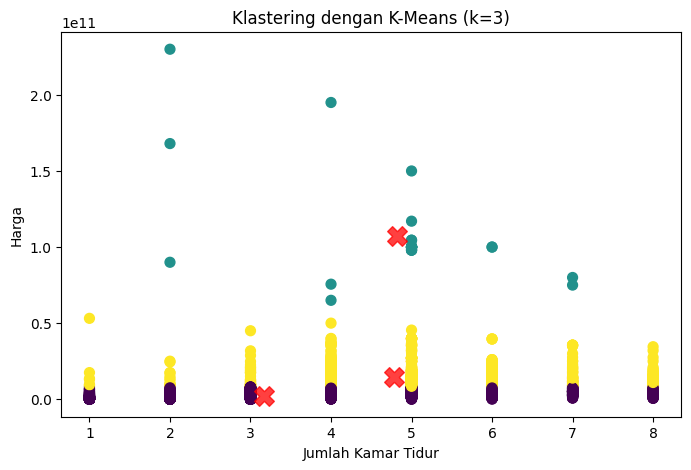

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menjalankan K-Means dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Visualisasi hasil klastering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.title('Klastering dengan K-Means (k=3)')
plt.show()


### CLUSTERING WITH HIERARCHICAL (COMPLETE LINKAGE)

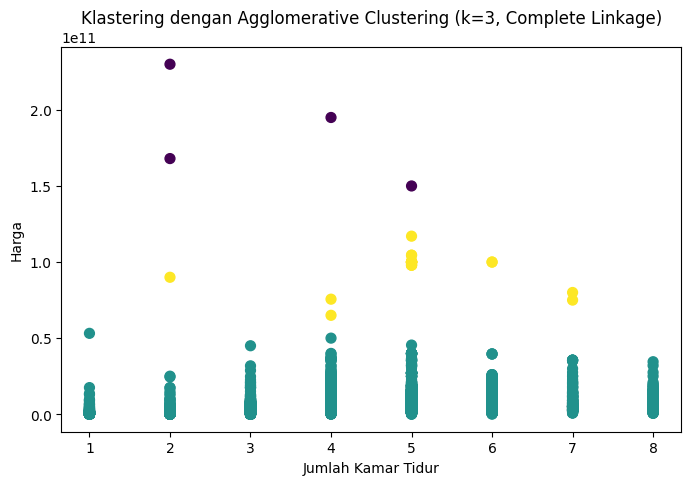

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Pilih fitur yang relevan untuk klastering
# Pastikan variabel data sudah didefinisikan sebelumnya
X = data[['bedRooms', 'price', 'buildingSize', 'landSize', 'bathRooms', 'garages']].values

# Menjalankan Agglomerative Clustering dengan jumlah cluster = 3 dan complete linkage
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agglomerative.fit_predict(X)

# Visualisasi hasil klastering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.title('Klastering dengan Agglomerative Clustering (k=3, Complete Linkage)')
plt.show()

### ambil data dengan cluster terendah untuk forecasting

In [ ]:
# Mendapatkan label cluster untuk setiap data point
data['cluster'] = labels

# Menghitung rata-rata harga untuk setiap cluster
cluster_avg_price = data.groupby('cluster')['price'].mean()

# Menemukan cluster dengan harga rata-rata terendah
lowest_price_cluster = cluster_avg_price.idxmin()

# Mengambil data dari cluster dengan harga terendah
lowest_price_cluster_data = data[data['cluster'] == lowest_price_cluster]

print("Cluster dengan harga rata-rata terendah:")
print(lowest_price_cluster_data)

Cluster dengan harga rata-rata terendah:
              price  buildingSize  landSize  bedRooms  bathRooms  garages  \
6        1300000000            70       102       2.0          1        0   
18       1500000000            60        64       2.0          2        0   
29        800000000           180       125       3.0          2        0   
35       1500000000           130        90       3.0          2        0   
45       2350000000            94        84       3.0          3        0   
...             ...           ...       ...       ...        ...      ...   
351798   1635000000            60       105       2.0          1        0   
351799  25000000000           968       708       7.0          5        4   
351800   1250000000            70        72       3.0          2        0   
351801  20000000000           700       600       7.0          7        0   
351802    650000000            55        60       3.0          2        1   

       province               city

C:\Users\ANITA\AppData\Local\Temp\ipykernel_4792\95737414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = labels


In [1]:
lowest_price_cluster_data.to_csv('data_properti_filtered.csv', index=False)

NameError: name 'lowest_price_cluster_data' is not defined

# Pemodelan

In [4]:
data= pd.read_csv('data_properti_filtered.csv')
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district,cluster
0,1300000000,70,102,2.0,1,0,Banten,Tangerang Selatan,BSD City,1
1,1500000000,60,64,2.0,2,0,Banten,Tangerang Selatan,Ciputat Timur,1
2,800000000,180,125,3.0,2,0,Banten,Tangerang,Karawaci,1
3,1500000000,130,90,3.0,2,0,Banten,Tangerang Selatan,Pondok Aren,1
4,2350000000,94,84,3.0,3,0,Banten,Tangerang Selatan,BSD City,1
...,...,...,...,...,...,...,...,...,...,...
35276,1635000000,60,105,2.0,1,0,Banten,Tangerang Selatan,BSD City,1
35277,25000000000,968,708,7.0,5,4,Banten,Tangerang Selatan,BSD City,1
35278,1250000000,70,72,3.0,2,0,Banten,Tangerang Selatan,BSD City,1
35279,20000000000,700,600,7.0,7,0,Banten,Tangerang Selatan,BSD City,1


In [ ]:
#pip install lightgbm

In [5]:
# One-Hot Encoding variabel city
data = pd.get_dummies(data, columns=['city'], prefix='city')

In [10]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Definisikan variabel prediktor dan variabel target
X = data.drop(columns=['price', 'province', 'district', 'cluster'])
y = data['price']

# Bagi data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model LightGBM
model_lgbm = lgb.LGBMRegressor()

# Training model menggunakan data latih
model_lgbm.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_lgbm = model_lgbm.predict(X_test)

# Evaluasi model
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f'Mean Squared Error (MSE): {mse_lgbm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lgbm}')
print(f'R-squared (R²): {r2_lgbm}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 28224, number of used features: 10
[LightGBM] [Info] Start training from score 2736699894.721691
Mean Squared Error (MSE): 1.8737095173474342e+18
Root Mean Squared Error (RMSE): 1368835095.01599
R-squared (R²): 0.853841218582862


c:\Users\yunit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


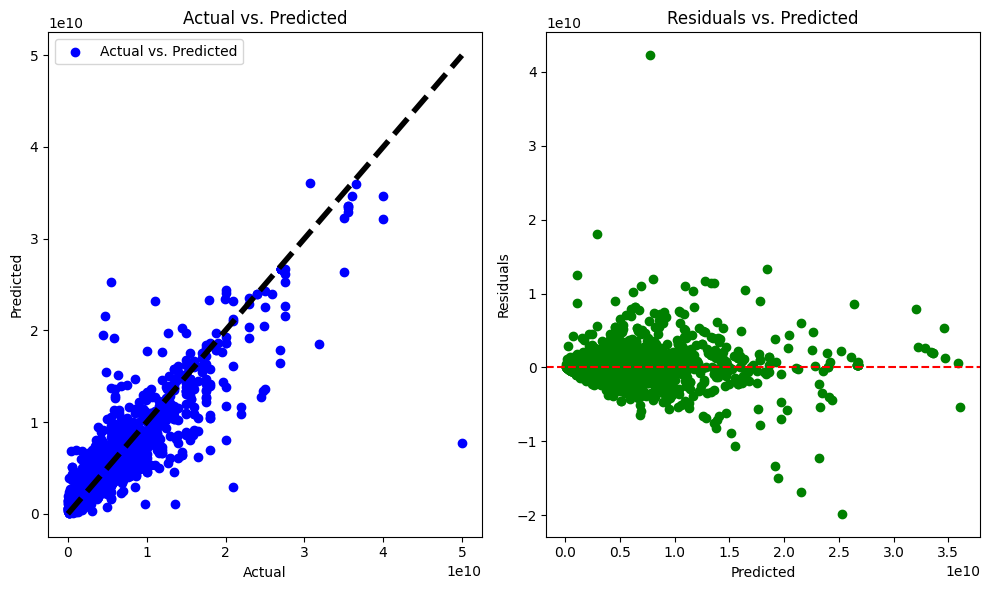

In [11]:
# Visualisasi hasil evaluasi
plt.figure(figsize=(10, 6))

# Scatter plot antara nilai sebenarnya dan nilai prediksi
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lgbm, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()

# Scatter plot antara residual dan nilai prediksi
residuals = y_test - y_pred_lgbm
plt.subplot(1, 2, 2)
plt.scatter(y_pred_lgbm, residuals, color='green')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted')

plt.tight_layout()
plt.show()


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)

# Training model menggunakan data latih
model_rf.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'R-squared (R²): {r2_rf}')

Mean Squared Error (MSE): 1.4704326173269376e+18
Root Mean Squared Error (RMSE): 1212613960.5525484
R-squared (R²): 0.8852988483461565


c:\Users\yunit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


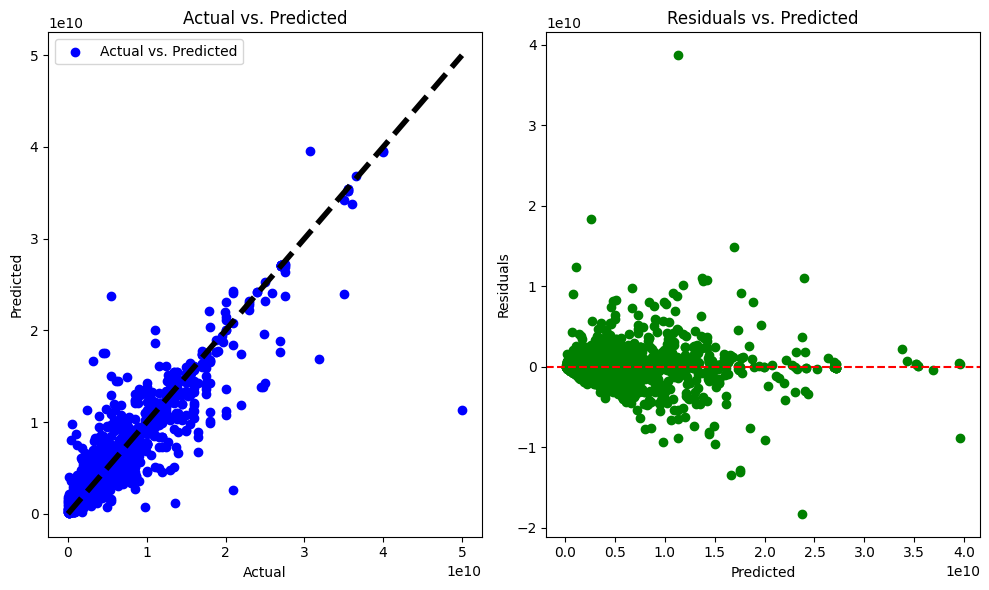

In [13]:
# Visualisasi hasil evaluasi
plt.figure(figsize=(10, 6))

# Scatter plot antara nilai sebenarnya dan nilai prediksi
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()

# Scatter plot antara residual dan nilai prediksi
residuals = y_test - y_pred_rf
plt.subplot(1, 2, 2)
plt.scatter(y_pred_rf, residuals, color='green')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.ensemble import ExtraTreesRegressor

# Inisialisasi model Extra Trees Regressor
model_et = ExtraTreesRegressor(random_state=42)

# Training model menggunakan data latih
model_et.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_et = model_et.predict(X_test)

# Evaluasi model
mse_et = mean_squared_error(y_test, y_pred_et)
rmse_et = mean_squared_error(y_test, y_pred_et, squared=False)
r2_et = r2_score(y_test, y_pred_et)

print(f'Mean Squared Error (MSE): {mse_et}')
print(f'Root Mean Squared Error (RMSE): {rmse_et}')
print(f'R-squared (R²): {r2_et}')


Mean Squared Error (MSE): 2.0738740761230932e+18
Root Mean Squared Error (RMSE): 1440095162.1761296
R-squared (R²): 0.8382273746424382


c:\Users\yunit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


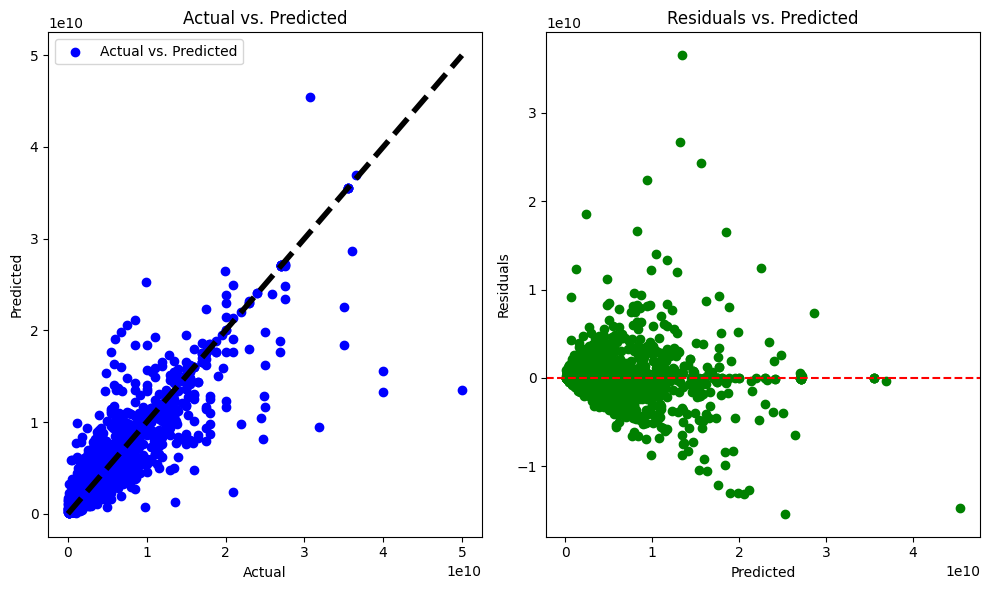

In [15]:
# Visualisasi hasil evaluasi
plt.figure(figsize=(10, 6))

# Scatter plot antara nilai sebenarnya dan nilai prediksi
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_et, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()

# Scatter plot antara residual dan nilai prediksi
residuals = y_test - y_pred_et
plt.subplot(1, 2, 2)
plt.scatter(y_pred_et, residuals, color='green')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted')

plt.tight_layout()
plt.show()


In [16]:
# Menyimpan prediksi dalam DataFrame
df1 = pd.DataFrame({'LightGBM': y_pred_lgbm})
df2 = pd.DataFrame({'Random Forest': y_pred_rf})
df3 = pd.DataFrame({'Extra Trees': y_pred_et})

# Menggabungkan prediksi terbaik dari masing-masing metode
ensemble_df = pd.concat([df1, df2, df3], axis=1)

# Mengganti nama indeks kolom menjadi 'record'
ensemble_df = ensemble_df.rename_axis('record', axis="columns")

# Menambahkan satu kolom baru berisi hasil ensemble menggunakan averaging
ensemble_df['Ensemble Average'] = ensemble_df.mean(axis=1)

print(ensemble_df)


record      LightGBM  Random Forest   Extra Trees  Ensemble Average
0       2.037389e+09   3.848274e+09  3.239105e+09      3.041589e+09
1       1.234240e+09   1.484036e+09  1.487750e+09      1.402009e+09
2       2.452110e+09   1.395000e+09  1.350000e+09      1.732370e+09
3       3.223924e+09   2.828786e+09  3.200000e+09      3.084237e+09
4       2.965122e+09   2.769950e+09  2.900000e+09      2.878357e+09
...              ...            ...           ...               ...
7052    2.540143e+09   2.934903e+09  3.100000e+09      2.858349e+09
7053    9.072181e+08   6.882000e+08  6.136000e+08      7.363394e+08
7054    5.006244e+09   3.768125e+09  5.010480e+09      4.594950e+09
7055    4.893104e+09   5.804000e+09  5.800000e+09      5.499035e+09
7056    2.502487e+09   2.472054e+09  2.475000e+09      2.483180e+09

[7057 rows x 4 columns]


In [18]:
# Evaluasi model Ensemble
mse_ensemble = mean_squared_error(y_test, ensemble_df['Ensemble Average'])
rmse_ensemble = mean_squared_error(y_test, ensemble_df['Ensemble Average'], squared=False)
r2_ensemble = r2_score(y_test, ensemble_df['Ensemble Average'])

print(f'Mean Squared Error (MSE): {mse_ensemble}')
print(f'Root Mean Squared Error (RMSE): {rmse_ensemble}')
print(f'R-squared (R²): {r2_ensemble}')

Mean Squared Error (MSE): 1.5615568460607416e+18
Root Mean Squared Error (RMSE): 1249622681.4765894
R-squared (R²): 0.8781906994543452


c:\Users\yunit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
y_test_indices = y_test.index
ensemble_indices = ensemble_df.index

print(f"Indices of y_test: {y_test_indices}")
print(f"Indices of Ensemble Average: {ensemble_indices}")


Indices of y_test: Index([ 1616, 15168, 29755, 29622, 15645, 14375,  1594, 16620, 11813, 17295,
       ...
       29491, 11326, 11567,  9242, 20993, 17091, 19812,  7439, 27874, 31748],
      dtype='int64', length=7057)
Indices of Ensemble Average: RangeIndex(start=0, stop=7057, step=1)


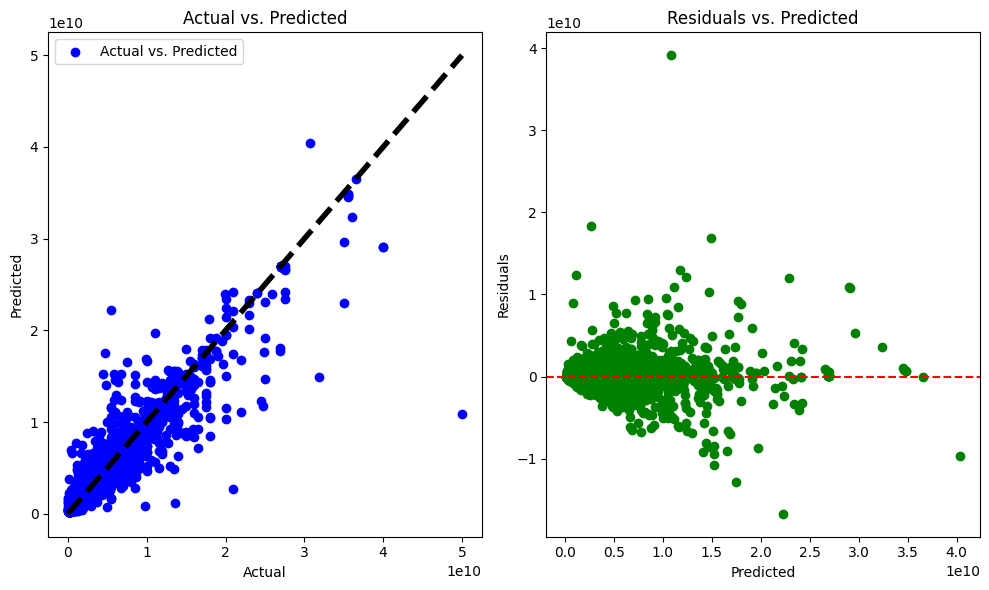

In [21]:
#reset index y_test
y_test = y_test.reset_index(drop=True)

# Visualisasi hasil evaluasi
plt.figure(figsize=(10, 6))

# Scatter plot antara nilai sebenarnya dan nilai prediksi
plt.subplot(1, 2, 1)
plt.scatter(y_test, ensemble_df['Ensemble Average'], color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()

# Scatter plot antara residual dan nilai prediksi
residuals_ensemble = y_test - ensemble_df['Ensemble Average']
plt.subplot(1, 2, 2)
plt.scatter(ensemble_df['Ensemble Average'], residuals_ensemble, color='green')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted')

plt.tight_layout()
plt.show()


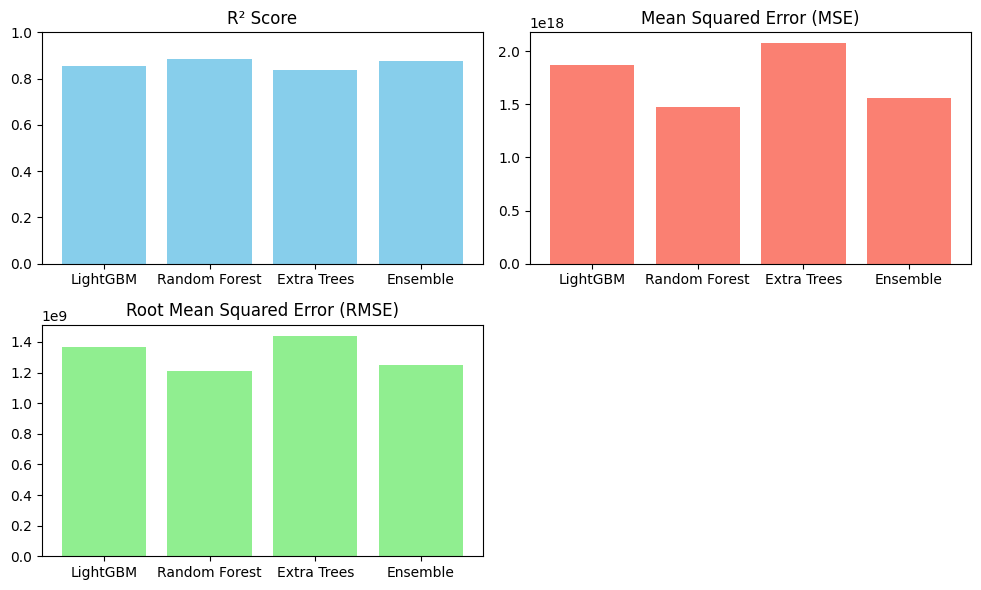

In [22]:
# Buat DataFrame untuk menyimpan hasil perhitungan
metrics_df = pd.DataFrame({
    'Model': ['LightGBM', 'Random Forest', 'Extra Trees', 'Ensemble'],
    'R²': [r2_lgbm, r2_rf, r2_et, r2_ensemble],
    'MSE': [mse_lgbm, mse_rf, mse_et, mse_ensemble],
    'RMSE': [rmse_lgbm, rmse_rf, rmse_et, rmse_ensemble]
})

# Membuat bar chart
plt.figure(figsize=(10, 6))

# Bar chart untuk R²
plt.subplot(2, 2, 1)
plt.bar(metrics_df['Model'], metrics_df['R²'], color='skyblue')
plt.title('R² Score')
plt.ylim(0, 1)

# Bar chart untuk MSE
plt.subplot(2, 2, 2)
plt.bar(metrics_df['Model'], metrics_df['MSE'], color='salmon')
plt.title('Mean Squared Error (MSE)')

# Bar chart untuk RMSE
plt.subplot(2, 2, 3)
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='lightgreen')
plt.title('Root Mean Squared Error (RMSE)')

plt.tight_layout()
plt.show()